In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [1]:
!nvidia-smi

Sat Dec 28 09:17:46 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
trainFile = 'emnistdigitstrain.zip'
testFile = 'emnistdigitstest.zip'
testPath = "/content/gdrive/My\ Drive/Colab\ Notebooks/SA_VGG_Keras/BurninPhase/emnistdigitstest.zip"
trainPath = "/content/gdrive/My\ Drive/Colab\ Notebooks/SA_VGG_Keras/BurninPhase/emnistdigitstrain.zip"
!cp {testPath} .
!cp {trainPath} .

In [0]:
import zipfile
with zipfile.ZipFile(f"{trainFile}","r") as zip_ref:
    zip_ref.extractall()

In [0]:
with zipfile.ZipFile(f"{testFile}","r") as zip_ref:
    zip_ref.extractall()

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [7]:
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

upload_files()

Saving CNNModel.py to CNNModel.py
Saving ConvolutionLayer.py to ConvolutionLayer.py
Saving FullyConnectedLayer.py to FullyConnectedLayer.py
Saving Hyperparameters.py to Hyperparameters.py
Saving PoolingLayer.py to PoolingLayer.py
Saving SA.py to SA.py


['CNNModel.py',
 'ConvolutionLayer.py',
 'FullyConnectedLayer.py',
 'Hyperparameters.py',
 'PoolingLayer.py',
 'SA.py']

In [0]:
import pandas as pd
train = pd.read_csv('emnist-digits-train.csv', header=None)
test = pd.read_csv('emnist-digits-test.csv', header=None)


x_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
x_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

In [23]:
x_train = x_train.as_matrix()
x_test = x_test.as_matrix()
y_train = y_train.as_matrix()
y_test = y_test.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [25]:
print(f"Shape of training features: {x_train.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of test features: {x_test.shape}")
print(f"Shape of test labels: {y_test.shape}")

Shape of training features: (240000, 28, 28, 1)
Shape of training labels: (240000,)
Shape of test features: (40000, 28, 28, 1)
Shape of test labels: (40000,)


In [0]:
np.random.seed(226)
Xtrain = np.empty((int(x_train.shape[0] / 2),28,28,1), dtype='uint8')
Ytrain = np.empty((int(y_train.shape[0] / 2)), dtype='uint8')
Xtest = np.empty((int(x_test.shape[0] / 2),28,28,1), dtype='uint8')
Ytest = np.empty(int(y_test.shape[0] / 2), dtype='uint8')

for i in range(int(x_train.shape[0] / 2)):
    rnd = np.random.randint(0, x_train.shape[0])
    Xtrain[i,:] = x_train[rnd,:]
    Ytrain[i] = y_train[rnd]

for j in range(int(x_test.shape[0] / 2)):
    rnd = np.random.randint(0, y_test.shape[0])
    Xtest[j,:] = x_test[rnd,:]
    Ytest[j] = y_test[rnd]

In [0]:
################## DEĞİŞ
np.random.seed(10)

input_shape = [None, 28, 28, 1]
number_of_classes = 10

#Conver output label to one hot vector
Ytrain = to_categorical(Ytrain, number_of_classes)
Ytest = to_categorical(Ytest, number_of_classes)

In [28]:
Ytrain.shape

(120000, 10)

In [29]:
Xtrain, Xvalid, Ytrain, Yvalid = train_test_split(Xtrain, Ytrain, 
                                   test_size = int(Xtrain.shape[0] * 0.1), random_state = 42)

print("Shape of training features: {}".format(Xtrain.shape))
print("Shape of training lables: {}".format(Ytrain.shape))
print("Shape of testing features: {}".format(Xvalid.shape))
print("Shape of testing lables: {}".format(Yvalid.shape))

Shape of training features: (108000, 28, 28, 1)
Shape of training lables: (108000, 10)
Shape of testing features: (12000, 28, 28, 1)
Shape of testing lables: (12000, 10)


In [0]:
#Hyper parameters
learning_rate = 0.01
epoch = 50
batch_size = 32

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


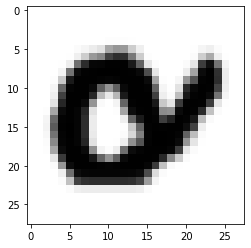

In [31]:
print(Ytrain[1])
plt.imshow(Xtrain[4,:,:,-1], cmap='Greys')

In [0]:
Xtrain = Xtrain.astype('float32')
Xvalid = Xvalid.astype('float32')

In [0]:
import SA as sannealing

In [34]:
Xvalid.shape

(12000, 28, 28, 1)

In [0]:
parameters = {'x_train': Xtrain , 'y_train': Ytrain, 'x_valid': Xvalid, 'y_valid': Yvalid, 'batch_size':batch_size, 'learning_rate':0.0001}

alg = sannealing.SA(**parameters)
alg.startAlgorithm()

Train on 108000 samples, validate on 12000 samples
Epoch 1/5
 42080/108000 [==========>...................] - ETA: 24s - loss: 0.5217 - acc: 0.8462

In [0]:
!cp model_0.json gdrive/My\ Drive/Colab\ Notebooks/SA_VGG_Keras/SA/
!cp model_1.json gdrive/My\ Drive/Colab\ Notebooks/SA_VGG_Keras/SA/
!cp model_2.json gdrive/My\ Drive/Colab\ Notebooks/SA_VGG_Keras/SA/
!cp model_3.json gdrive/My\ Drive/Colab\ Notebooks/SA_VGG_Keras/SA/
!cp model_4.json gdrive/My\ Drive/Colab\ Notebooks/SA_VGG_Keras/SA/